In [1]:
import pandas as pd
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Owner\Anaconda3\Library\bin\graphviz'

In [2]:
dataset=pd.read_csv("Iris.csv")

In [3]:
dataset=dataset.drop("Id",axis=1)

In [4]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.Species=dataset.Species.map({'Iris-setosa':0,'Iris-versicolor':1,"Iris-virginica":2})

In [6]:
X=dataset.drop("Species",axis=1)
y=dataset['Species']
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
species=['Iris-setosa','Iris-versicolor',"Iris-virginica"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
trees=DecisionTreeClassifier()

In [10]:
trees.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
!pip install graphviz
!pip install pydotplus
import pydotplus
from IPython.display import Image  
from sklearn.externals.six import StringIO  

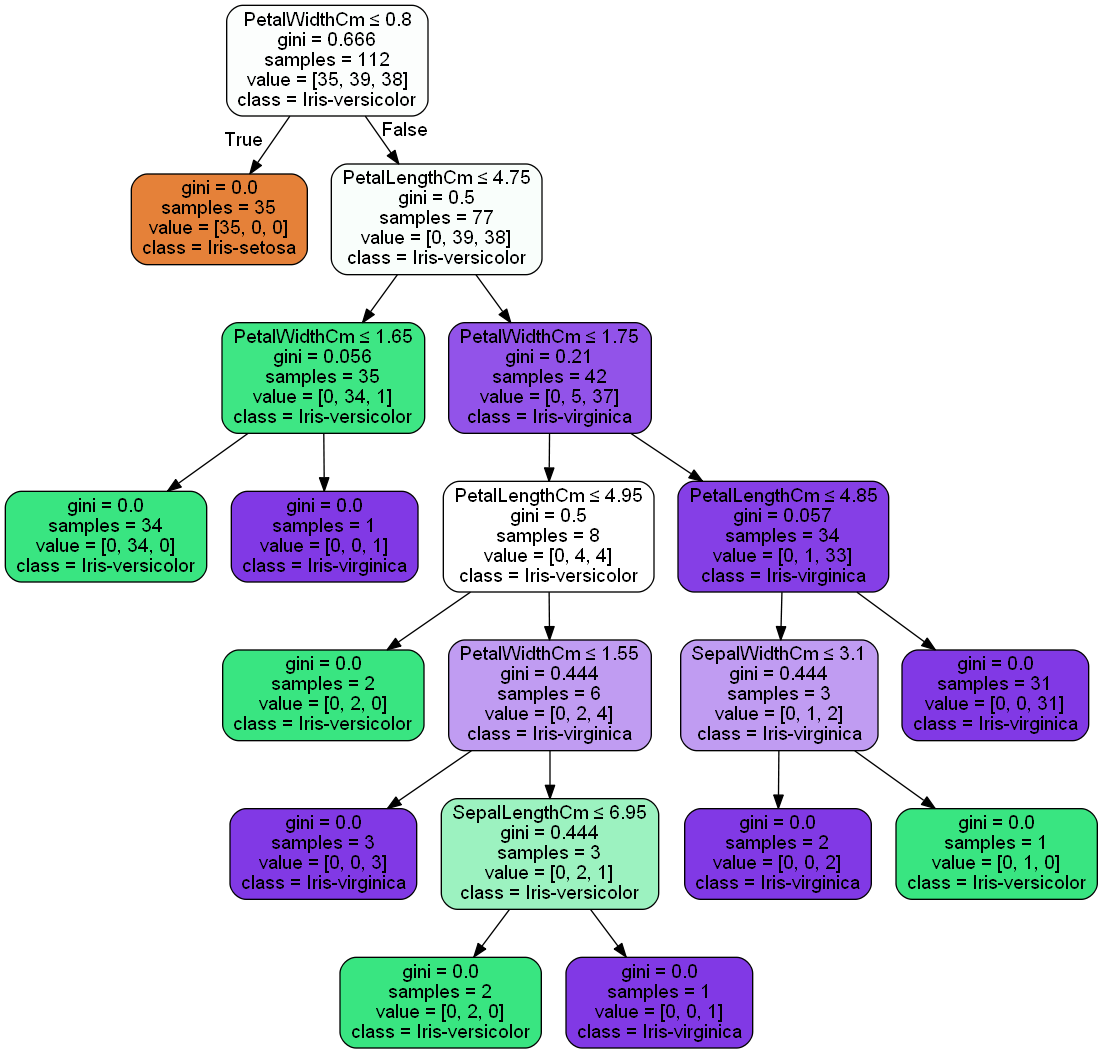

In [12]:
from sklearn.tree import export_graphviz
dot_data = StringIO()
tree.export_graphviz(trees,
                     out_file=dot_data,
                     feature_names = features, 
                     class_names=species,
                     rounded=True,
                     special_characters=True,
                     filled = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [13]:
y_pred=trees.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test,y_pred)

1.0